In [2]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Karate_data_import.ipynb
import sys
sys.path.append('../') 
from Functions import *

In [14]:
# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(2)
cov_matrix = np.array([[1.0, 0], [0, 1.0]])
num_samples = 34

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [15]:
# Adding stopping criteria
alpha = 5
dim = 2
prev_grad = 200 
grad = 0
k = 0
n = 100
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 100: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y,points,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points[i] += LR(k)*grad_now # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function_prior_fast(points,Y,2,alpha) # Calcualte the probability using Loss_function
    k += 1

/Users/signeolsen/Desktop/Latent_distance_models/Karate dataset/../Functions.py:99: RuntimeWarning: overflow encountered in multiply
  numerators = -2 * connections[:, np.newaxis] * point_index_diff * np.exp(-connections * (alpha - distances))[:, np.newaxis]


In [16]:
k

6

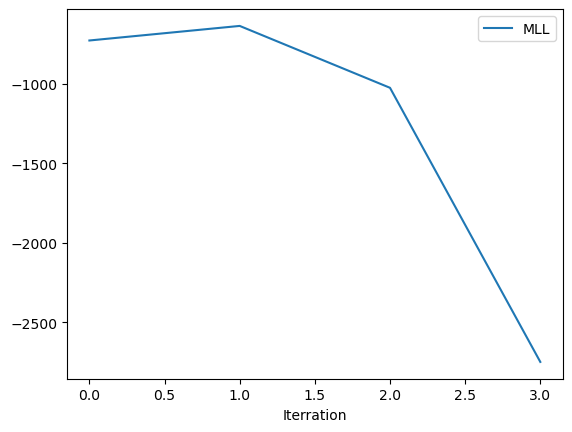

In [7]:
plt.plot(MLL[0:k],label='MLL')
#plt.plot(grad_sum1[0:k], label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

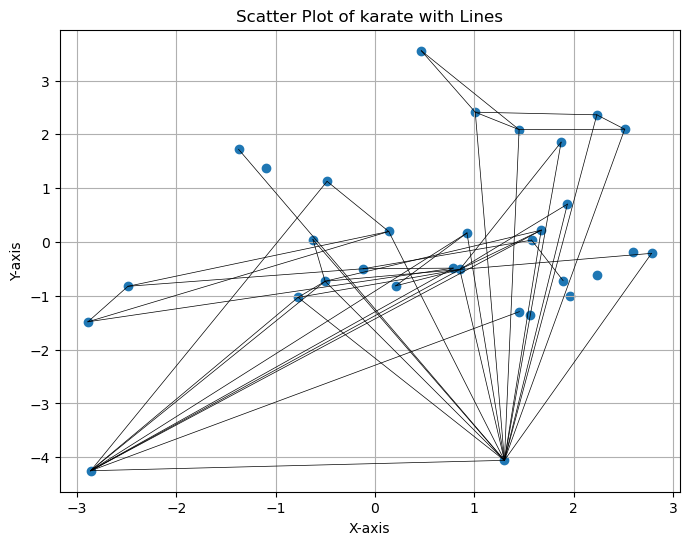

In [8]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of karate with Lines')
plt.grid(True)
plt.show()